# Finding a scale for stratification

Stratification is a key parameter for how much water gets upwelled through a canyon. Since I am changing vertical diffusivity within the canyon and outside, I am changing the rate at which stratification is destroyed through diffusion of T and S within the canyon and outside. This calls for a function or a scale to estimate how fast this destruction happens and how different from the initial stratification, $N_o$, will the local stratification, $N$, be after some time $t_f$. 

For the canyon, I want to find what will the stratification be around the rim of the canyon at some time $t_f$ after the time dependent phase and during the advective phase as a function of the vertical diffusivity (remember in my experiments $\kappa_vT=\kappa_vS$) and the initial stratification $N_o$.

First, we need a timescale for diffusion, i.e. How fast is diffusivity going to destroy the T and S gradients. To calculate that we also need a vertical scale for the gradients. We will assume we case about the stratification nead the rim of the canyon and that the vertical scale $\Delta z$ is of order 10's of meters. In that case, we can define a timescale 

$$\tau=\frac{\Delta z^2}{\kappa_v}.$$

In our experiments, $\kappa v$ within the canyon and outside varies between $10^{-3}$ $m^2/s$ to $10^{-7}$ $m^2/s$, so the timescales are

|$\kappa_v$ (m$^2$/s)|$\tau$ (s)|$\tau$ (days)|
|:--------:|:--------:|:------------|
| $10^{-3}$  | $10^5$   | 1.2         |
| $10^{-4}$  | $10^6$   | 11.6        |
| $10^{-5}$  | $10^7$   | 115.7       |
| $10^{-7}$  | $10^9$   | 11574.1     |


I want to find an expression $N = N(t_f,\tau,N_0)$ such that if $t_f\to\tau$, $N \to 0$ and if $t_f<<\tau$ then $N \to N_0$. One option is 

$$N = N_0 \frac{\tau-t_f}{\tau}$$ for $t_f < \tau$.

We will try out this expression in the following to see if it is a good approximation.

In [171]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

In [249]:
def plotN(ax,z,N,N0,lab,title):
    ax.plot(N*100000,z,label=lab)
    ax.plot(N0*100000,z,'--',color='grey',label='')
    ax.axhline(rc[30],linestyle='--',color='0.6')
    ax.axhline(rc[26],linestyle='--',color='0.6')
    ax.set_title(title)
    ax.set_xlabel('$N^2-N_0^2$ ($10^{-5} s^{-2}$)')
    ax.set_ylabel('depth (m)')

def plot_max_N(ax,day,N,lab,colour,msize,title):
    hand, = ax.plot(day,max(N)*100000,'o',color=sns.xkcd_rgb[colour],markersize=msize,label=lab)
    ax.set_title(title)
    ax.set_ylabel('$N^2-N_0^2$ ($10^{-5} s^{-2}$)')
    ax.set_xlabel('days')
    return hand

def plot_Z_max_N(ax,day,z,N,lab,colour,msize,title):
    max_value = max(N)
    max_index = N.idxmax(axis=1)
    hand, = ax.plot(day,z[max_index],'o',color=sns.xkcd_rgb[colour],markersize=msize,label=lab)
    ax.set_title(title)
    ax.set_ylabel('Depth of max $N^2-N_0^2$ (m)')
    ax.set_xlabel('days')
    return hand

def plot_N_at_z(ax,day,N,zind1,zind2,lab,colour,msize,title):
    sb_value = N[slice(zind1,zind2)].mean()
    hand, = ax.plot(day,sb_value*100000,'o',color=sns.xkcd_rgb[colour],markersize=msize,label=lab)
    ax.set_title(title)
    ax.set_ylabel('$N^2-N_0^2$ ($10^{-5} s^{-2}$)')
    ax.set_xlabel('days')
    return hand


In [217]:
def plotN2(st,expNames,col_pal):
    
    fig1= plt.figure(figsize=(16,6))

    ax1 = plt.subplot(1,4,1)
    ax2 = plt.subplot(1,4,2)
    ax3 = plt.subplot(1,4,3)
    ax4 = plt.subplot(1,4,4)

    axs = [ax1,ax2,ax3,ax4]

    sns.set_palette(color_pal)
    keys = ['N2_tt02','N2_tt06','N2_tt10','N2_tt14']
    key0 = ['N2_tt00']

    for runs in expNames:

        for key,a in zip(keys,axs):

            sname = st
            filename1 = ('../results/metricsDataFrames/N2_%s_%s.csv' % (runs,sname))

            df = pd.read_csv(filename1)
            df_anom=df.sub(df[key0].squeeze(),axis=0)
            plotN(a,rc[1:-1],df_anom[key],df_anom[key0],runs,('%s,%s' %(key, sname)))


    ax3.legend(loc=0)   
    plt.show()
    
    return fig1

def plotMax(st,expNames,colours,sizes,exp_labels):
    
    fig1= plt.figure(figsize=(10,4))

    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    
    axs = [ax1,ax2]

    key0 = ['N2_tt00']
    keys = ['N2_tt00','N2_tt02','N2_tt04','N2_tt06','N2_tt08','N2_tt10','N2_tt12','N2_tt14','N2_tt16']
    days = [0,1,2,3,4,5,6,7,8]
    labels = []
    
    for runs,cc,msize in zip(expNames,colours,sizes):
        
        for key,day in zip(keys,days):

            sname = st
            filename1 = ('../results/metricsDataFrames/N2_%s_%s.csv' % (runs,sname))

            df = pd.read_csv(filename1)
            df_anom=df.sub(df[key0].squeeze(),axis=0)
            col = df_anom[key]
            
            hand1 = plot_max_N(ax1,day,col,runs,cc,msize,'Max N per day, %s' %st)
            hand2 = plot_Z_max_N(ax2,day,rc[1:-1],col,runs,cc,msize,'Depth max N per day, %s' %st)
        
        labels.append(hand1)
    
    
    ax2.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    plt.show()
    
    return fig1

def plotN_atDepth(st,expNames,colours,sizes,exp_labels,z_ind1,z_ind2):
    fig1= plt.figure(figsize=(5,4))

    ax1 = plt.subplot(1,1,1)
    
    axs = [ax1]

    key0 = ['N2_tt00']
    keys = ['N2_tt00','N2_tt02','N2_tt04','N2_tt06','N2_tt08','N2_tt10','N2_tt12','N2_tt14','N2_tt16']
    days = [0,1,2,3,4,5,6,7,8]
    labels = []
    
    for runs,cc,msize in zip(expNames,colours,sizes):
        
        for key,day in zip(keys,days):

            sname = st
            filename1 = ('../results/metricsDataFrames/N2_%s_%s.csv' % (runs,sname))

            df = pd.read_csv(filename1)
            df_anom=df.sub(df[key0].squeeze(),axis=0)
            col = df_anom[key]
            
            hand1 = plot_N_at_z(ax1,day,col,z_ind1,z_ind2,runs,cc,msize,'Mean N head to sh depth , %s' %st)
            
        labels.append(hand1)
    
    
    ax1.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    plt.show()
    
    return fig1



In [174]:
# Set appearance options seaborn

sns.set_style('white')
sns.set_context('notebook')


In [175]:
# Set necessary grid variables and grid file

grid = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc')
rc = grid.RC

# station locations
ys = [262,220,262,227,245,245,262,220,100]
xs = [60,60,180,180,160,200,300,300,180]

station_names = ['UpSh','UpSl','CH','CM','UpC','DnC','DnSh','DnSl','CO']

### Stations where I calculated $N^2$

Script **`get_N2.py`**, calculates $N^2$ everyday at the following stations and saves the whole profile in a csv file using pandas. I ran it for all experiments with a canyon. There are two peaks in the calculation, one below 150 m and the other one around 250 m. These are where the vertical resolution changes and when I calculated the derivative $d\rho/dz$ I got these spikes.



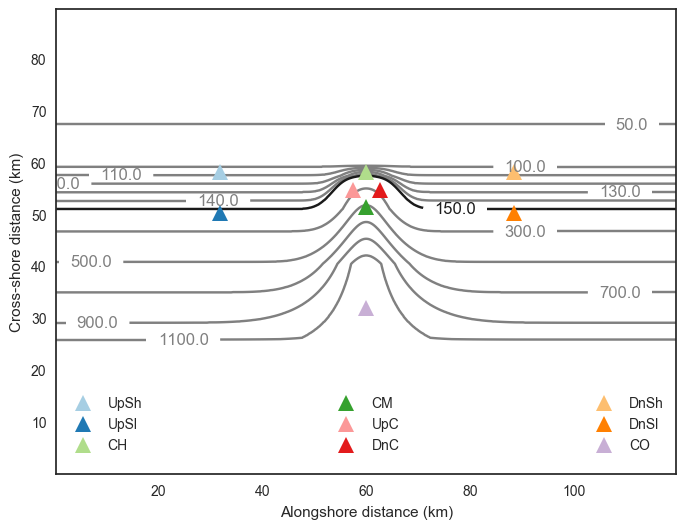

In [240]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

cntr = ax.contour(grid.X/1000,grid.Y/1000,grid.Depth,
                  [50,100,110,120,130,140,150,300,500,700,900,1100],
                  colors=['0.5','0.5','0.5','0.5','0.5','0.5','0.1','0.5','0.5','0.5','0.5','0.5','0.5'])
ax.clabel(cntr,fmt='%0.1f')

sns.set_palette('Paired',9)
for x,y,stn_name in zip(xs,ys,station_names):
    ax.plot(grid.X[x]/1000,grid.Y[y]/1000,'^',markersize=12,label=stn_name)

ax.legend(bbox_to_anchor=(0., 0.02, 1., .102), loc=8,ncol=3, mode="expand")
ax.set_xlabel('Alongshore distance (km)')
ax.set_ylabel('Cross-shore distance (km)')

<xarray.DataArray 'Z' ()>
array(-112.5)
Coordinates:
    Z        float64 -112.5
Attributes:
    long_name: vertical coordinate of cell center
    units: meters
    positive: up


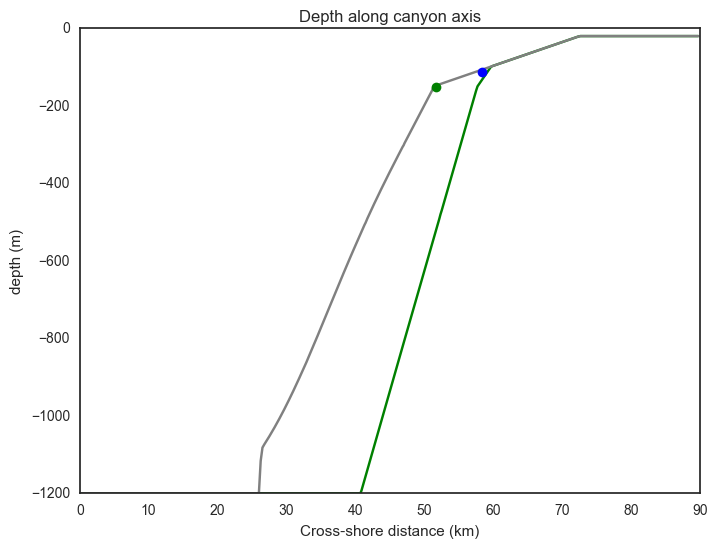

In [241]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(grid.YC[:,180]/1000,-grid.Depth[:,180],'g-')
ax.plot(grid.YC[:,100]/1000,-grid.Depth[:,100],'-',color='grey')
ax.plot(grid.YC[227,100]/1000,grid.Z[30],'go')  
ax.plot(grid.YC[262,100]/1000,grid.Z[22],'bo')  
ax.set_title('Depth along canyon axis')
ax.set_ylabel('depth (m)')
ax.set_xlabel('Cross-shore distance (km)')

print(grid.Z[22])

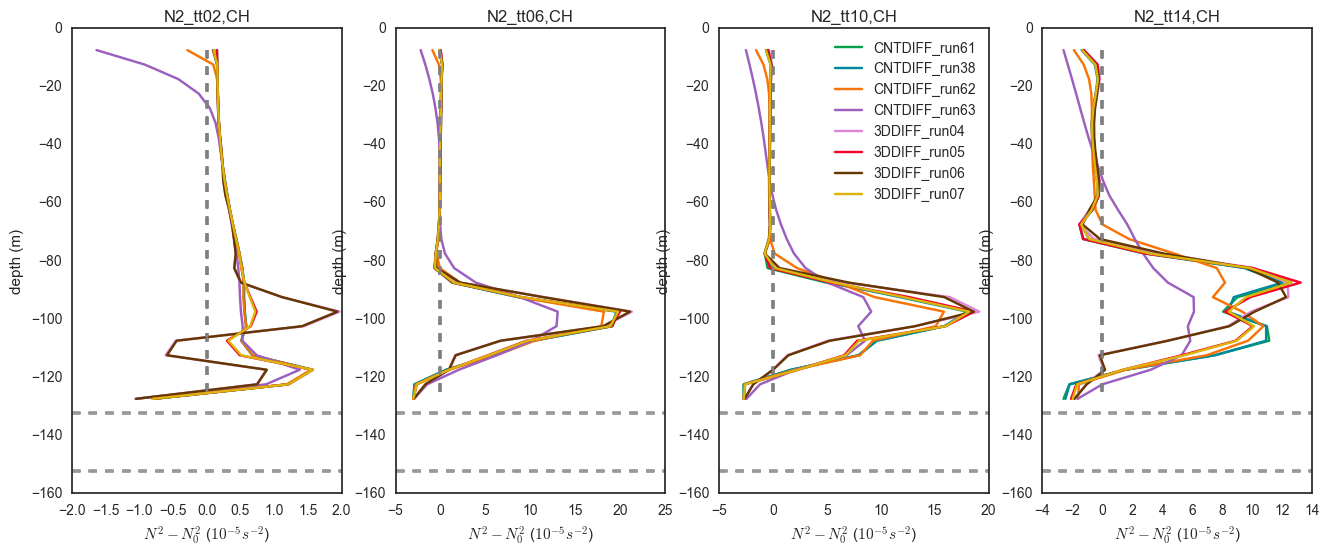

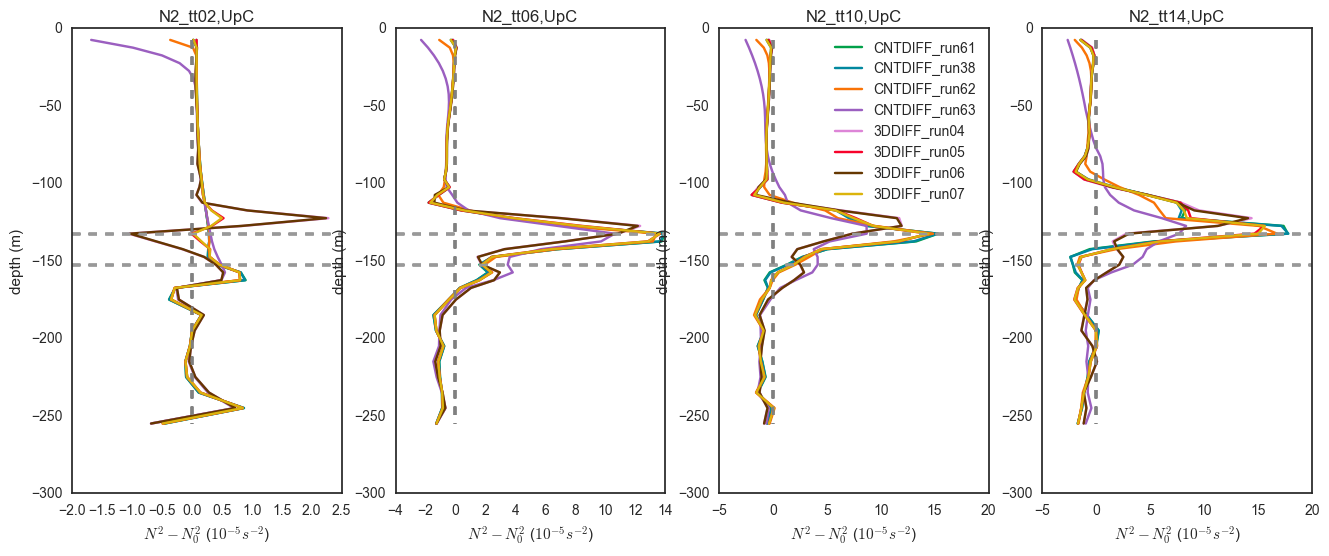

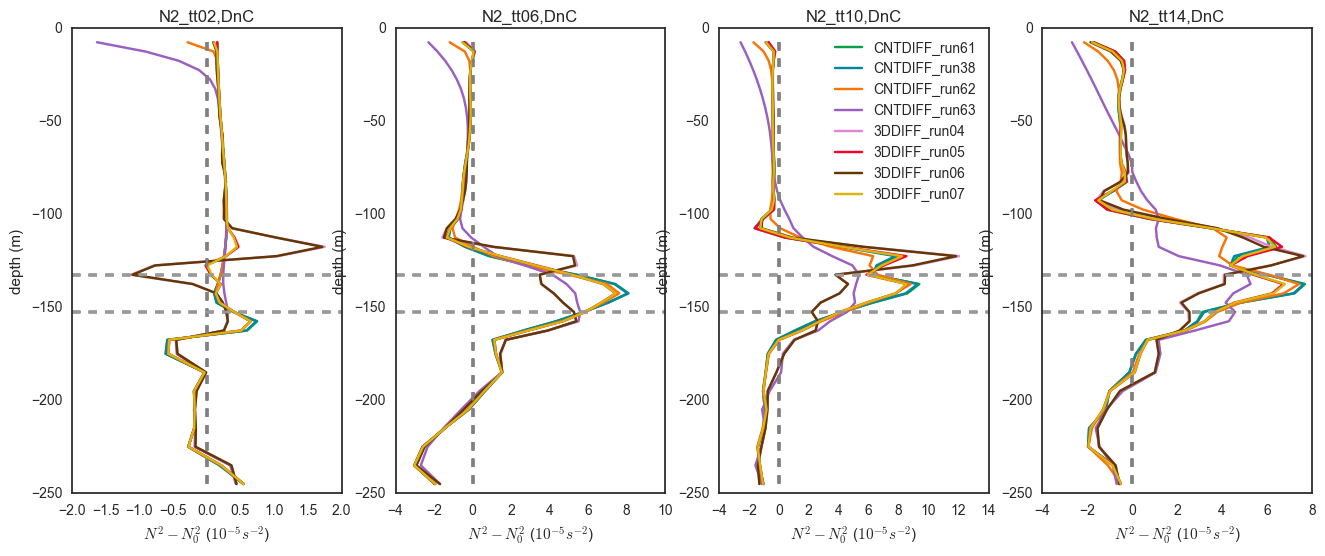

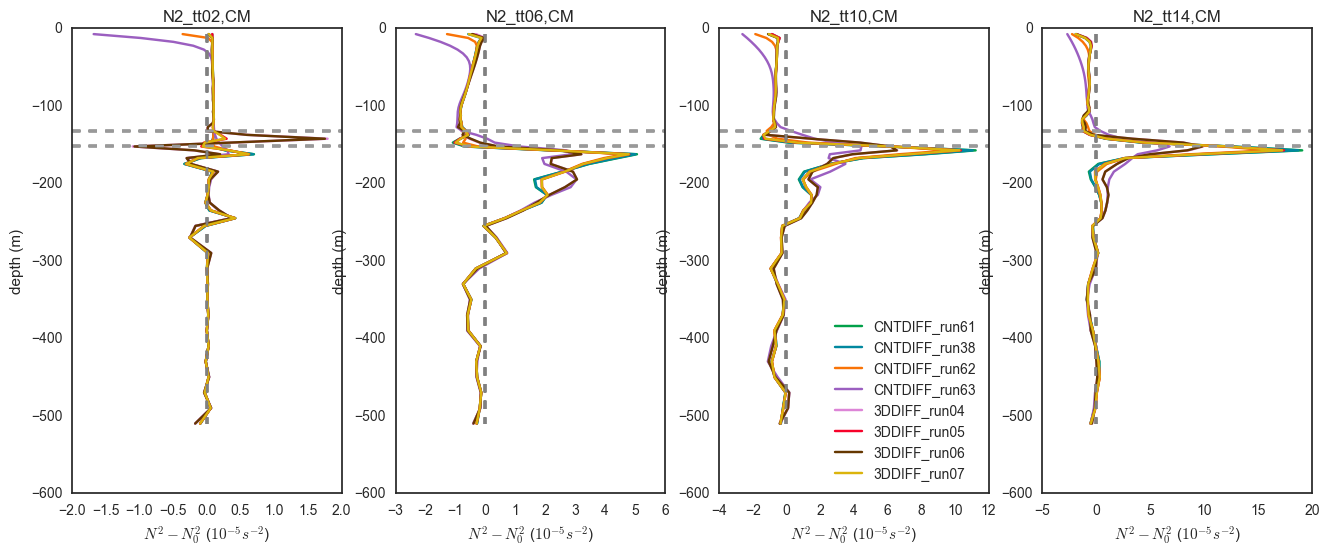

In [250]:
stationsCanyon = ['CH','UpC','DnC','CM']

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']


colours = ["emerald",#
          "teal blue",# 
          "orange",# 
          "amethyst",# 
          "lavender pink",
          "cherry red",
          "brown",
          "gold"]# 

colour_pal = sns.xkcd_palette(colours)

for stname in stationsCanyon:
    
    figHand = plotN2(stname,expNames,colour_pal)
    #figName = ('results/figures/BuoyancyFrequency/N2_Kv3D_%s.png' %stname)
    #figHand.savefig(figName,format='png')

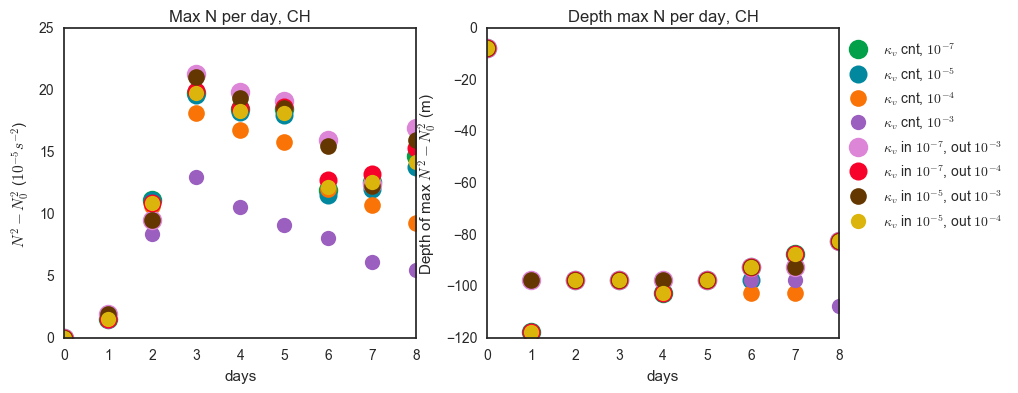

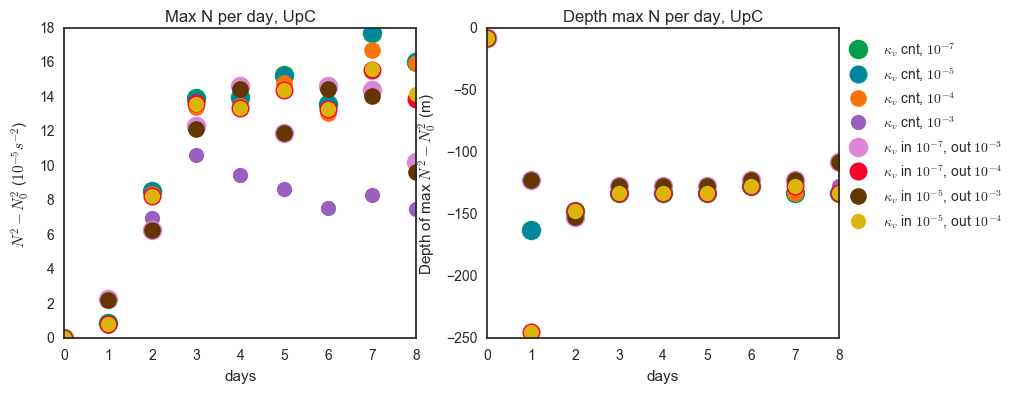

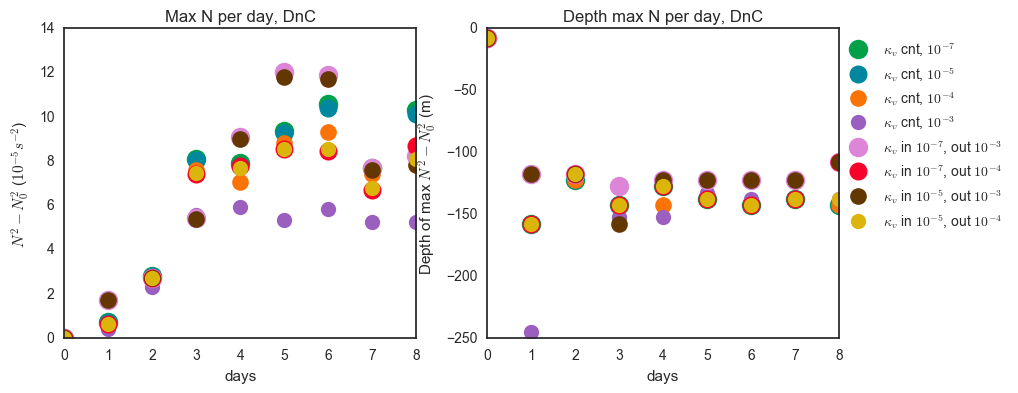

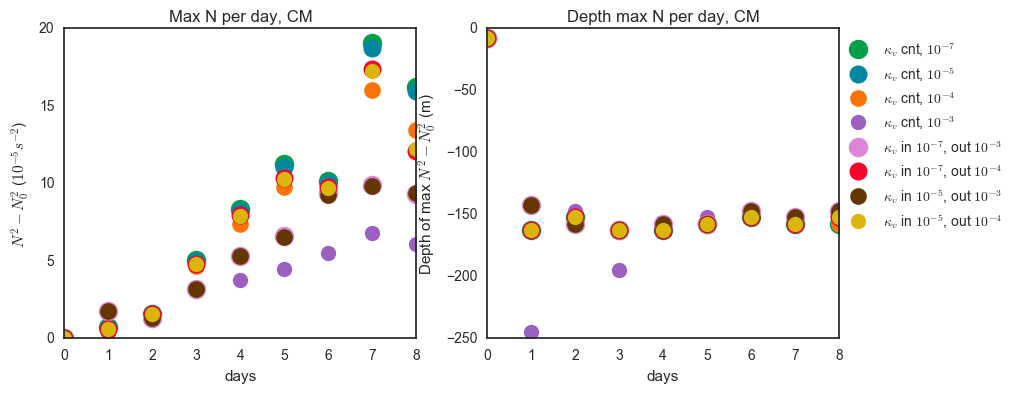

In [227]:
stationsCanyon = ['CH','UpC','DnC','CM']

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']

kv_lab = ['$\kappa_v$ cnt, $10^{-7}$',
         '$\kappa_v$ cnt, $10^{-5}$',
         '$\kappa_v$ cnt, $10^{-4}$',
         '$\kappa_v$ cnt, $10^{-3}$',
         '$\kappa_v$ in $10^{-7}$, out $10^{-3}$',
         '$\kappa_v$ in $10^{-7}$, out $10^{-4}$',
         '$\kappa_v$ in $10^{-5}$, out $10^{-3}$',
         '$\kappa_v$ in $10^{-5}$, out $10^{-4}$']

colours = ["emerald",#
          "teal blue",# 
          "orange",# 
          "amethyst",# 
          "lavender pink",
          "cherry red",
          "brown",
          "gold"]# 

sizes = [14,13,12,11,14,13,12,11]
for stname in stationsCanyon:
    
    figHand = plotMax(stname,expNames,colours,sizes, kv_lab)
    
    
    #figName = ('results/figures/BuoyancyFrequency/N2_Kv3D_%s.png' %stname)
    #figHand.savefig(figName,format='png')

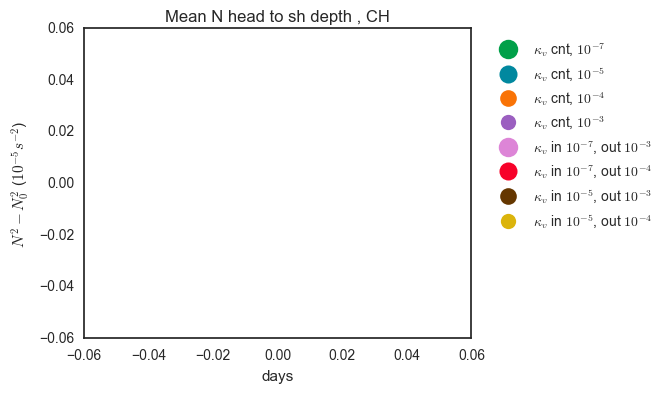

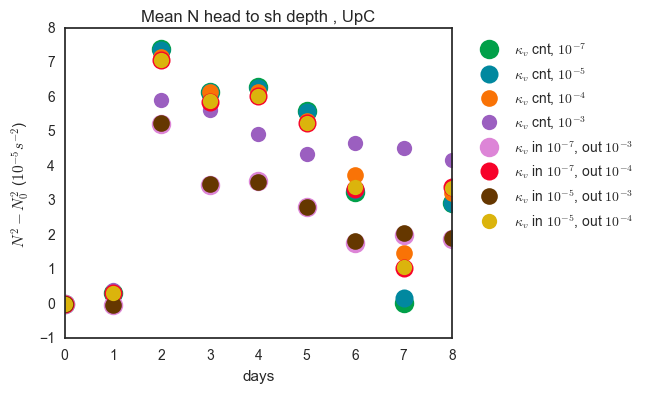

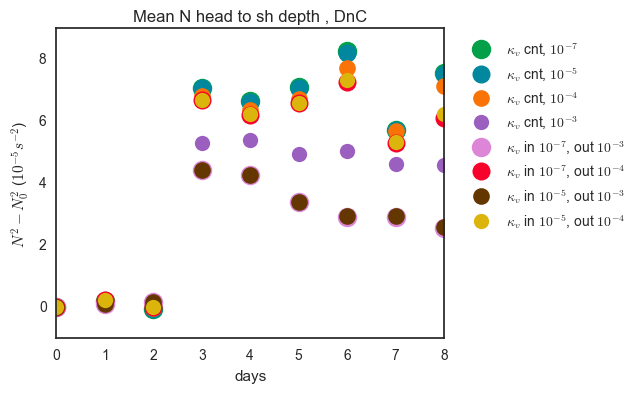

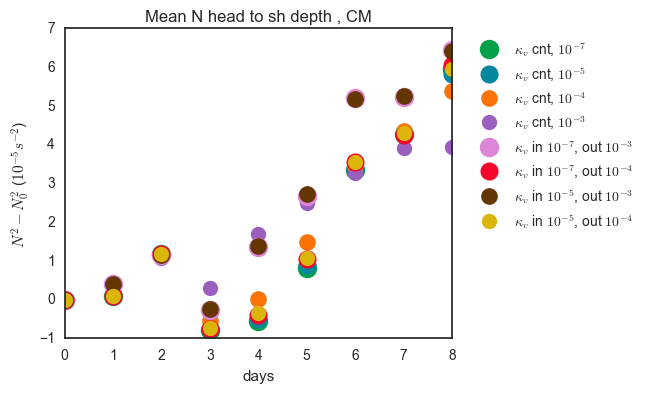

In [248]:
stationsCanyon = ['CH','UpC','DnC','CM']

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']

kv_lab = ['$\kappa_v$ cnt, $10^{-7}$',
         '$\kappa_v$ cnt, $10^{-5}$',
         '$\kappa_v$ cnt, $10^{-4}$',
         '$\kappa_v$ cnt, $10^{-3}$',
         '$\kappa_v$ in $10^{-7}$, out $10^{-3}$',
         '$\kappa_v$ in $10^{-7}$, out $10^{-4}$',
         '$\kappa_v$ in $10^{-5}$, out $10^{-3}$',
         '$\kappa_v$ in $10^{-5}$, out $10^{-4}$']

colours = ["emerald",#
          "teal blue",# 
          "orange",# 
          "amethyst",# 
          "lavender pink",
          "cherry red",
          "brown",
          "gold"]# 

sizes = [14,13,12,11,14,13,12,11]
for stname in stationsCanyon:
    
    figHand = plotN_atDepth(stname,expNames,colours,sizes, kv_lab,26,30)
    
    
    #figName = ('results/figures/BuoyancyFrequency/N2_Kv3D_%s.png' %stname)
    #figHand.savefig(figName,format='png')

### Compare to runs where N is changing

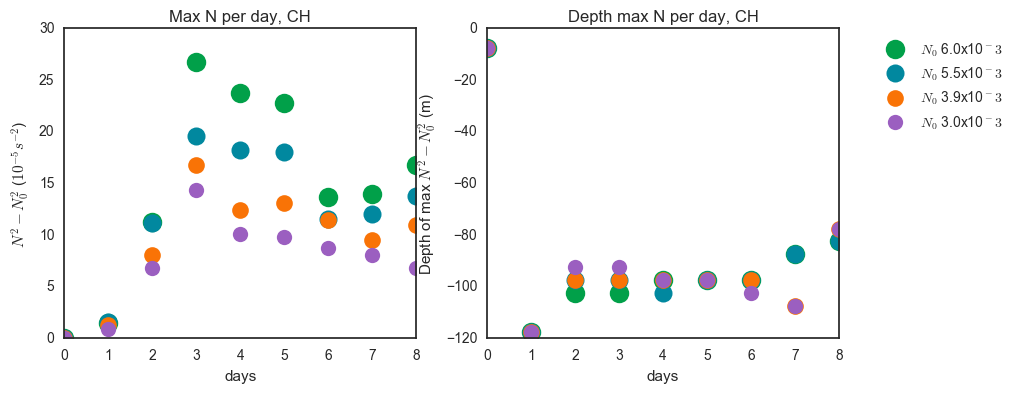

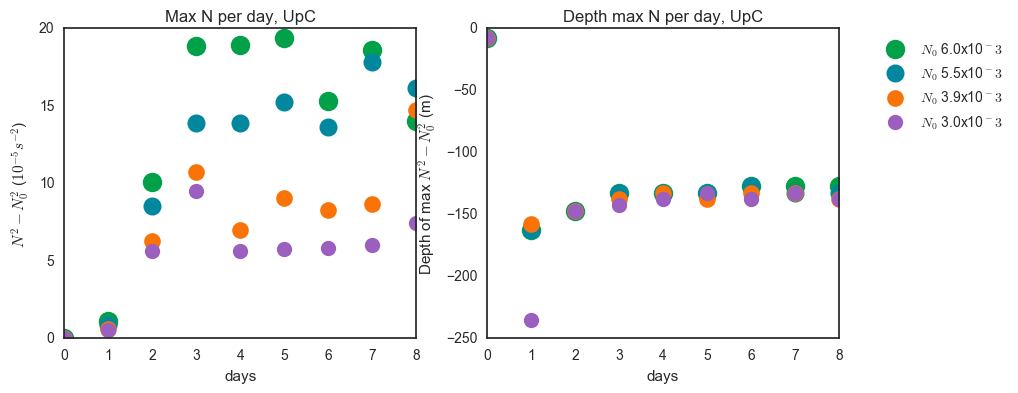

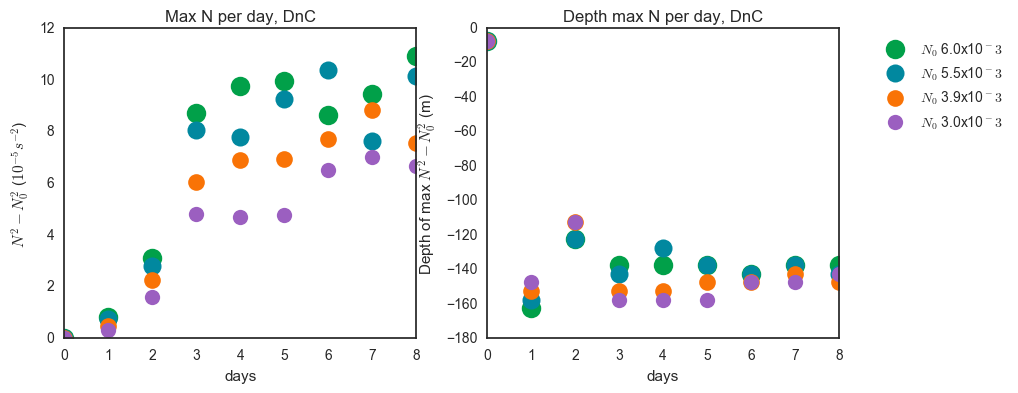

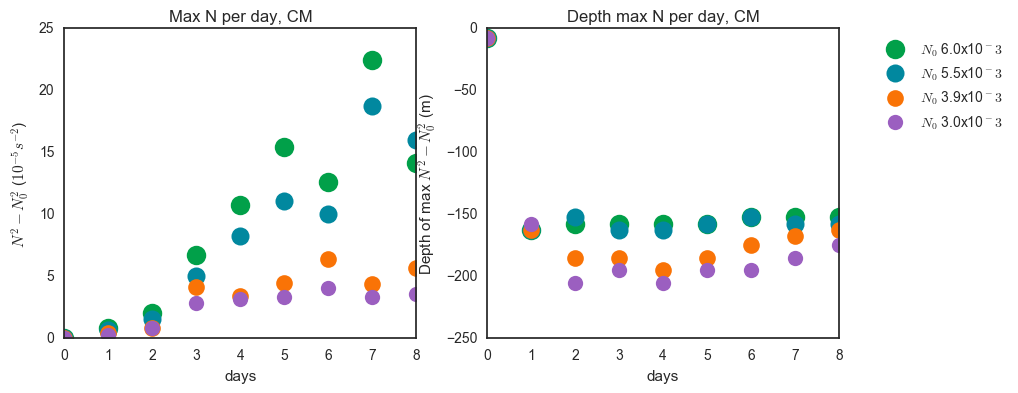

In [251]:
stationsCanyon = ['CH','UpC','DnC','CM']

expNames = ['CNTDIFF_run45',
           'CNTDIFF_run38',
           'CNTDIFF_run44',
           'CNTDIFF_run46',
           ]

kv_lab = ['$N_0$ 6.0x10$^-3$',
         '$N_0$ 5.5x10$^-3$',
         '$N_0$ 3.9x10$^-3$',
         '$N_0$ 3.0x10$^-3$',
         ]

colours = ["emerald",#
          "teal blue",# 
          "orange",# 
          "amethyst"]# 

sizes = [14,13,12,11]
for stname in stationsCanyon:
    
    figHand = plotMax(stname,expNames,colours,sizes, kv_lab)
    
    
    #figName = ('results/figures/BuoyancyFrequency/N2_Kv3D_%s.png' %stname)
    #figHand.savefig(figName,format='png')

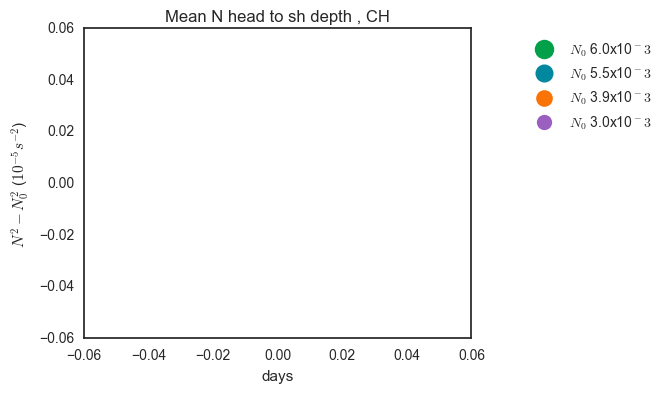

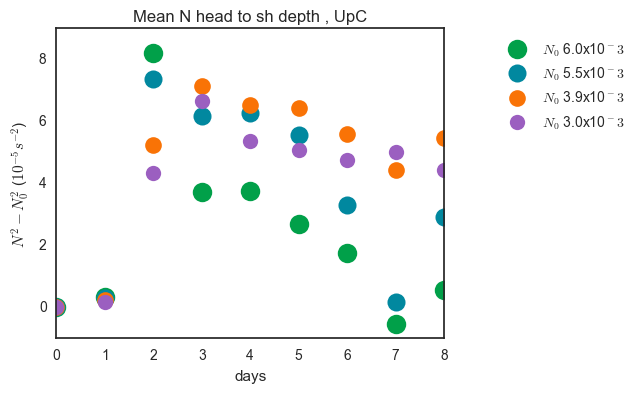

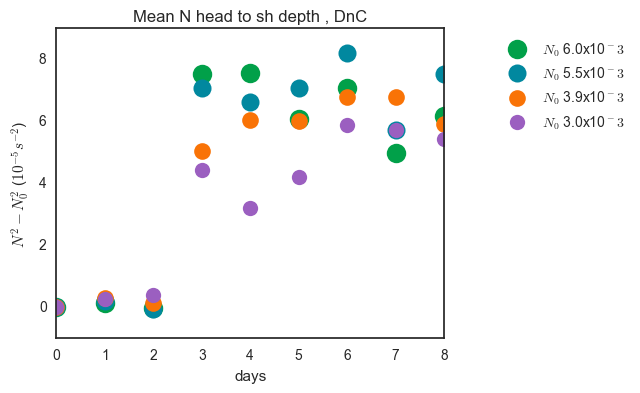

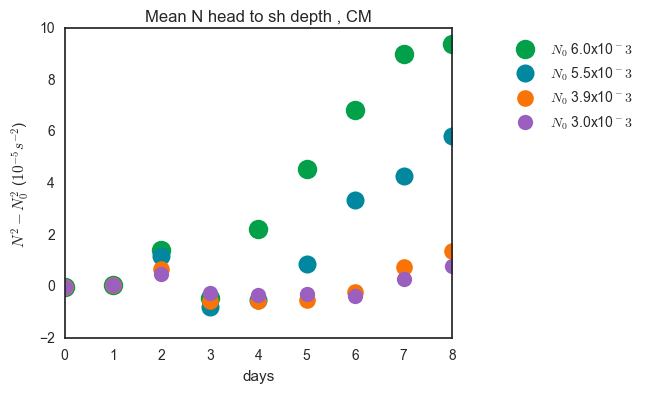

In [252]:

for stname in stationsCanyon:
    
    figHand = plotN_atDepth(stname,expNames,colours,sizes, kv_lab,26,30)
